# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Make the API request for the current city
        response = requests.get(city_url)
        
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachny
Processing Record 2 of Set 1 | mo i rana
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | konarka
Processing Record 9 of Set 1 | vorkuta
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | shahr-e kord
Processing Record 12 of Set 1 | tofol
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | puerto el triunfo
Processing Record 15 of Set 1 | tekane
City not found. Skipping...
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | tionk essil
Processing Record 21 of Set 1 | espargos
City not

Processing Record 41 of Set 4 | rongelap
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | ashland
Processing Record 44 of Set 4 | novo oriente
Processing Record 45 of Set 4 | caucete
Processing Record 46 of Set 4 | ulladulla
Processing Record 47 of Set 4 | coahuayana de hidalgo
Processing Record 48 of Set 4 | invercargill
Processing Record 49 of Set 4 | nampula
Processing Record 0 of Set 5 | belmonte
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | ghat
Processing Record 3 of Set 5 | raja
Processing Record 4 of Set 5 | hun
Processing Record 5 of Set 5 | korkuteli
Processing Record 6 of Set 5 | isle of lewis
City not found. Skipping...
Processing Record 7 of Set 5 | sarmiento
Processing Record 8 of Set 5 | datong
Processing Record 9 of Set 5 | verkhneyarkeyevo
Processing Record 10 of Set 5 | tarko-sale
Processing Record 11 of Set 5 | akureyri
Processing Record 12 of Set 5 | klyuchi
Processing Record 13 of Set 5 | jashpurnagar
Processing Re

Processing Record 33 of Set 8 | san luis
Processing Record 34 of Set 8 | cinisi
Processing Record 35 of Set 8 | bitkine
Processing Record 36 of Set 8 | yarmouth
Processing Record 37 of Set 8 | ribeira grande
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | baglung
Processing Record 40 of Set 8 | south cleveland
Processing Record 41 of Set 8 | afaahiti
Processing Record 42 of Set 8 | panama city beach
Processing Record 43 of Set 8 | northam
Processing Record 44 of Set 8 | velky meder
Processing Record 45 of Set 8 | bojia
Processing Record 46 of Set 8 | kakonko
Processing Record 47 of Set 8 | rio grande
Processing Record 48 of Set 8 | djelfa
Processing Record 49 of Set 8 | mili
Processing Record 0 of Set 9 | shalqar
Processing Record 1 of Set 9 | changji
Processing Record 2 of Set 9 | camara de lobos
Processing Record 3 of Set 9 | kamaishi
Processing Record 4 of Set 9 | yamba
Processing Record 5 of Set 9 | three points
Processing Record 6 of Set 9 | shache
Processin

Processing Record 23 of Set 12 | greymouth
Processing Record 24 of Set 12 | martuk
Processing Record 25 of Set 12 | jinzhou
Processing Record 26 of Set 12 | khromtau
Processing Record 27 of Set 12 | xining
Processing Record 28 of Set 12 | richards bay
Processing Record 29 of Set 12 | codo
Processing Record 30 of Set 12 | kotido
Processing Record 31 of Set 12 | alo
Processing Record 32 of Set 12 | antsirabe afovoany
City not found. Skipping...
Processing Record 33 of Set 12 | jijel
Processing Record 34 of Set 12 | burhar
Processing Record 35 of Set 12 | la sarre
Processing Record 36 of Set 12 | choma
Processing Record 37 of Set 12 | tonghae
Processing Record 38 of Set 12 | setti fatma
City not found. Skipping...
Processing Record 39 of Set 12 | rondonopolis
Processing Record 40 of Set 12 | east london
Processing Record 41 of Set 12 | benoy
Processing Record 42 of Set 12 | lazaro cardenas
Processing Record 43 of Set 12 | neiafu
Processing Record 44 of Set 12 | oriximina
Processing Record

In [19]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,20.25,59,83,1.24,RU,1690135837
1,mo i rana,66.3128,14.1428,15.18,89,75,2.24,NO,1690135837
2,adamstown,-25.0660,-130.1015,20.50,71,9,8.54,PN,1690135837
3,whitehorse,60.7161,-135.0538,23.29,46,3,2.15,CA,1690135714
4,port-aux-francais,-49.3500,70.2167,6.25,82,81,17.69,TF,1690135837
...,...,...,...,...,...,...,...,...,...
574,san sebastian de la gomera,28.0916,-17.1133,27.99,65,0,4.12,ES,1690135942
575,kyshtovka,56.5550,76.6271,17.40,75,96,2.34,RU,1690135942
576,novyy urengoy,66.0833,76.6333,19.47,66,75,2.32,RU,1690135942
577,huazhou,21.6333,110.5833,25.92,84,100,2.00,CN,1690135942


In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,20.25,59,83,1.24,RU,1690135837
1,mo i rana,66.3128,14.1428,15.18,89,75,2.24,NO,1690135837
2,adamstown,-25.0660,-130.1015,20.50,71,9,8.54,PN,1690135837
3,whitehorse,60.7161,-135.0538,23.29,46,3,2.15,CA,1690135714
4,port-aux-francais,-49.3500,70.2167,6.25,82,81,17.69,TF,1690135837


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df_sorted = city_data_df.sort_values(by='Lat', ascending=False)

city_data_df_sorted

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
39,longyearbyen,78.2186,15.6401,11.91,62,40,5.66,SJ,1690135843
92,tiksi,71.6872,128.8694,4.60,73,95,2.12,RU,1690135852
159,olonkinbyen,70.9221,-8.7187,4.84,88,92,4.77,SJ,1690135865
540,hammerfest,70.6634,23.6821,14.25,62,0,5.14,NO,1690135936
68,vadso,70.0744,29.7487,9.09,81,100,6.69,NO,1690135848
...,...,...,...,...,...,...,...,...,...
4,port-aux-francais,-49.3500,70.2167,6.25,82,81,17.69,TF,1690135837
52,puerto natales,-51.7236,-72.4875,1.67,79,11,1.12,CL,1690135845
184,punta arenas,-53.1500,-70.9167,2.35,71,10,4.22,CL,1690135659


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

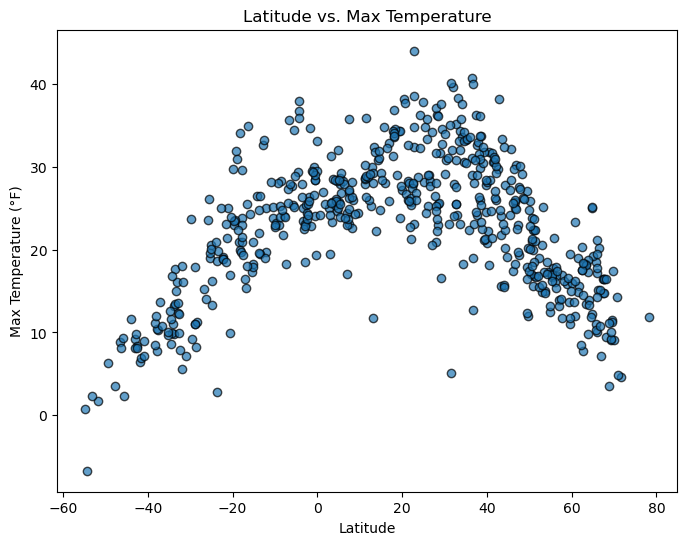

In [36]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

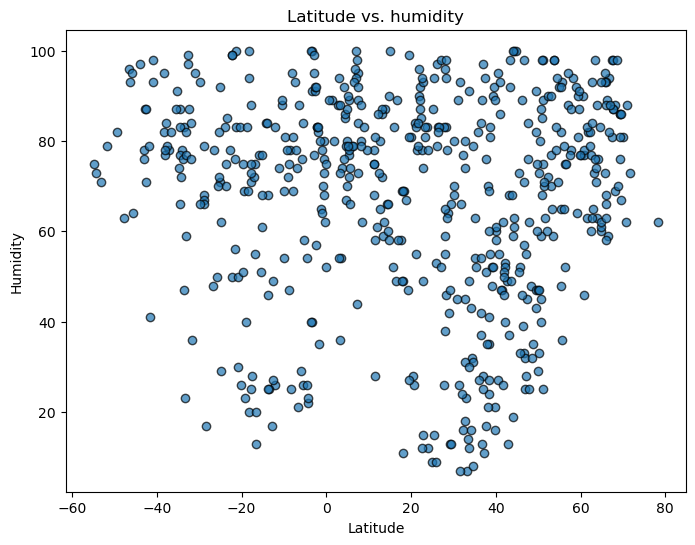

In [38]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', alpha=0.7)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

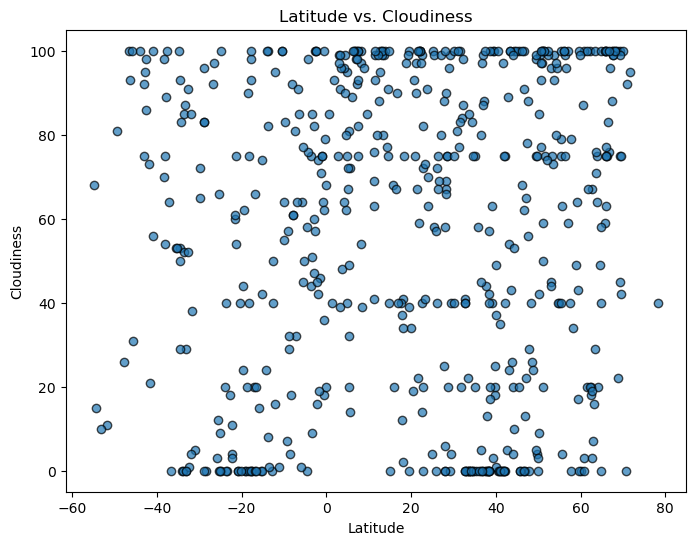

In [71]:
# Build the scatter plots for latitude vs. Cloudiness
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', alpha=0.7)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

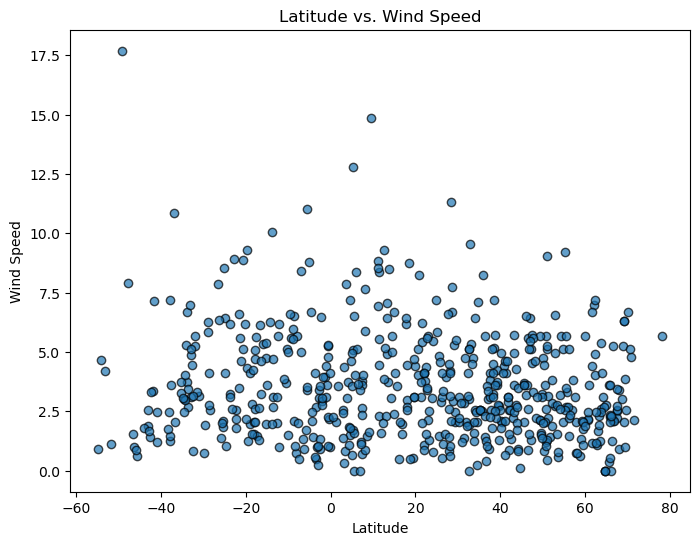

In [45]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Weight (g)'], merged_df['Tumor Volume (mm3)'])

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,20.25,59,83,1.24,RU,1690135837
1,mo i rana,66.3128,14.1428,15.18,89,75,2.24,NO,1690135837
3,whitehorse,60.7161,-135.0538,23.29,46,3,2.15,CA,1690135714
5,gadzhiyevo,69.2551,33.3362,9.05,86,100,6.31,RU,1690135838
7,konarka,19.9000,86.1167,27.22,81,34,4.42,IN,1690135838


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,20.50,71,9,8.54,PN,1690135837
4,port-aux-francais,-49.3500,70.2167,6.25,82,81,17.69,TF,1690135837
6,edinburgh of the seven seas,-37.0676,-12.3116,13.68,78,64,10.84,SH,1690135838
9,blackmans bay,-43.0167,147.3167,9.18,78,92,1.89,AU,1690135838
16,port mathurin,-19.6833,63.4167,22.93,75,24,9.31,MU,1690135840


###  Temperature vs. Latitude Linear Regression Plot

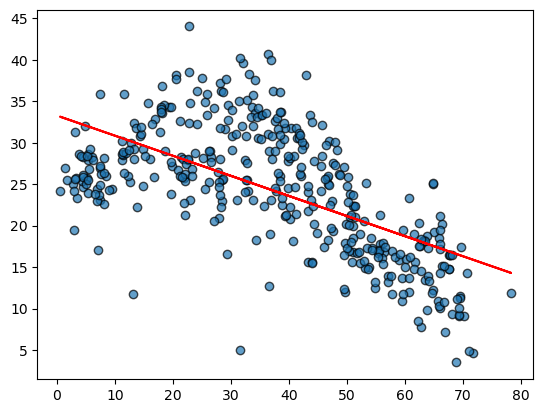

In [61]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
latitude = northern_hemi_df['Lat']
max_temp = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

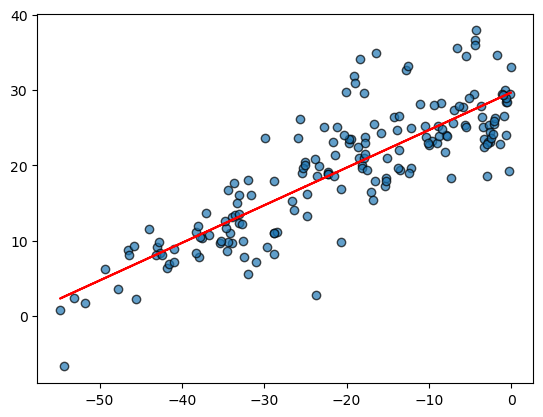

In [62]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
latitude = southern_hemi_df['Lat']
max_temp = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
latitude = northern_hemi_df['Lat']
max_temp = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
latitude = southern_hemi_df['Lat']
max_temp = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

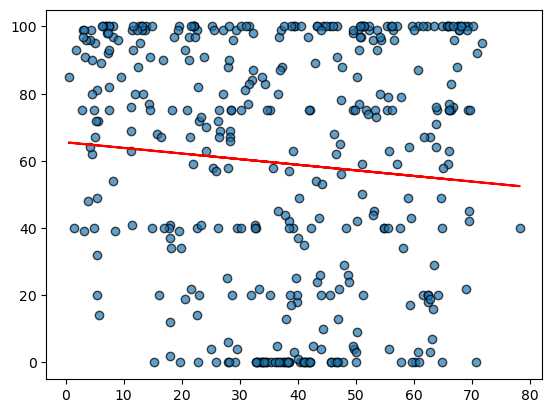

In [63]:
# Northern Hemisphere
# YOUR CODE HERE
latitude = northern_hemi_df['Lat']
max_temp = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

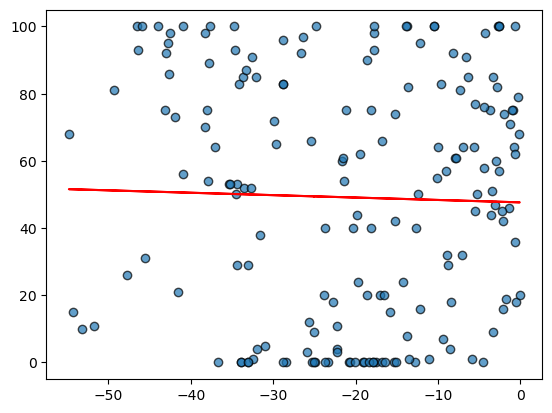

In [64]:
# Southern Hemisphere
# YOUR CODE HERE
latitude = southern_hemi_df['Lat']
max_temp = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

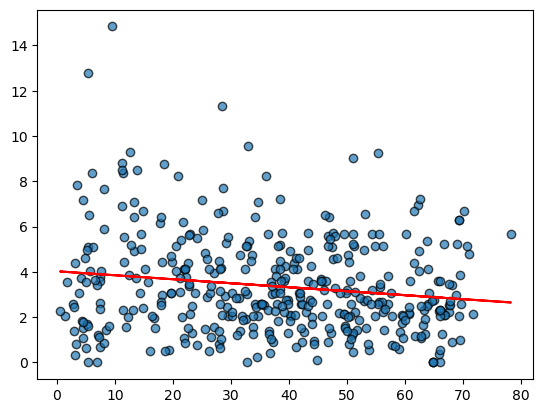

In [65]:
# Northern Hemisphere
# YOUR CODE HERE
latitude = northern_hemi_df['Lat']
max_temp = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

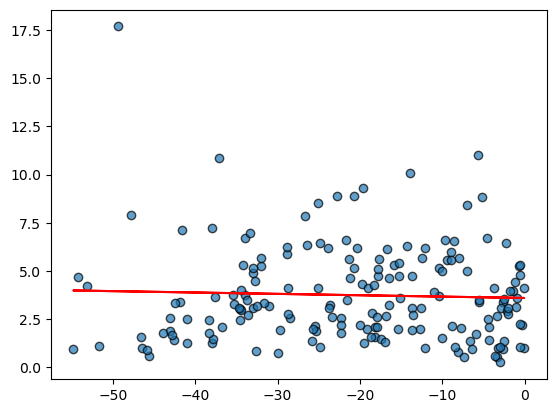

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
latitude = southern_hemi_df['Lat']
max_temp = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latitude,max_temp, marker='o', edgecolors='black', alpha=0.7)
plt.plot(latitude,regress_values,"r-")

**Discussion about the linear relationship:** YOUR RESPONSE HERE